# ELECTRICIDDAD EN ESPAÑA

En esta parte de nuestro análisis vamos a centrar nuestros esfuerzos en analizar los datos de la electricidad en España y como han variado en los últimos años.

Para ello, vamos a tener en cuenta los diferentes eventos que han acontecido en España en los úlitmos años (Covid-19, inicio de guerra, tensión con Marruecos, ...etc.).

In [2]:
'''
ESte codigo solo aplica si corres tu gran parte de tu trabajo en google colab como fue mi caso:
# Cargamos la parte de poder subir los archivos de drive
from google.colab import drive
drive.mount('/content/drive')
''' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
# from google.colab import files # solo es necesario en google colab para descargar archivos

In [4]:
# Configuración de pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df= pd.read_json('data/3_electricidad_hora_España.json')
df.head()

,id,name,geoid,geoname,values,datetime
0,600,Precio mercado SPOT Diario España,3,España,66.88,2019-01-01T00:00:00+01:00
1,600,Precio mercado SPOT Diario España,3,España,66.88,2019-01-01T01:00:00+01:00
2,600,Precio mercado SPOT Diario España,3,España,66.00,2019-01-01T02:00:00+01:00
3,600,Precio mercado SPOT Diario España,3,España,63.64,2019-01-01T03:00:00+01:00
4,600,Precio mercado SPOT Diario España,3,España,58.85,2019-01-01T04:00:00+01:00


La información que recogen las columnas de nuestro dataframes son las siguientes:
- **name**: nombres del mercado o país del que son los datos.
- ***geoid**: numero asociado al lugar dentro de España.
- ***values**: valor de la electricidad en ese tiempo de medida.
- **datetime***: fecha de recogida de datos.

Los datos de la electricidad en nuestro dataframe se miden en euros por megavatio-hora (€/MWh).

Aclarar que para nuestro estudio se han tomado medidas desde el 2019.


In [6]:
# Cambiamos el nombre de value establecer el precio
df.rename(columns={'values':'Value(€/MWh)'}, inplace=True)
df.rename(columns={'datetime':'datetime(utc)'}, inplace= True)

In [7]:
df.head()

,id,name,geoid,geoname,Value(€/MWh),datetime(utc)
0,600,Precio mercado SPOT Diario España,3,España,66.88,2019-01-01T00:00:00+01:00
1,600,Precio mercado SPOT Diario España,3,España,66.88,2019-01-01T01:00:00+01:00
2,600,Precio mercado SPOT Diario España,3,España,66.00,2019-01-01T02:00:00+01:00
3,600,Precio mercado SPOT Diario España,3,España,63.64,2019-01-01T03:00:00+01:00
4,600,Precio mercado SPOT Diario España,3,España,58.85,2019-01-01T04:00:00+01:00


In [8]:
# Mostramos información de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96422 entries, 0 to 96421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             96422 non-null  int64  
 1   name           96422 non-null  object 
 2   geoid          96422 non-null  int64  
 3   geoname        96422 non-null  object 
 4   Value(€/MWh)   96422 non-null  float64
 5   datetime(utc)  96422 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.4+ MB


Aqui podemos ver el tipo de las columnas que tenemos en el dataframe, y también podemos ver que no tenemos valores nulos dentro de nuestro dataframe. Gracias a este pequeño comando podemos ver que no es necesario arreglar valores nulos.

Por otro lado, no vamos analizar los valores atípicos porque no queremos distorcionar los datos.

In [9]:
# Codigo para demostrar que no tenemos valores nulos
columnas = df.columns

for col in columnas:
  valores_nulos = df[col].isnull().sum()/len(df)*100
  print(f'{col}: {valores_nulos}%')

id: 0.0%
name: 0.0%
geoid: 0.0%
geoname: 0.0%
Value(€/MWh): 0.0%
datetime(utc): 0.0%


In [10]:
# Cambiamos el tipo de dato de datetime a tipo tiempo UTC
df['datetime(utc)']= pd.to_datetime(df['datetime(utc)'], utc=True)

In [11]:
# Comprobamos cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96422 entries, 0 to 96421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             96422 non-null  int64              
 1   name           96422 non-null  object             
 2   geoid          96422 non-null  int64              
 3   geoname        96422 non-null  object             
 4   Value(€/MWh)   96422 non-null  float64            
 5   datetime(utc)  96422 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 4.4+ MB


In [12]:
df.head()

,id,name,geoid,geoname,Value(€/MWh),datetime(utc)
0,600,Precio mercado SPOT Diario España,3,España,66.88,2018-12-31 23:00:00+00:00
1,600,Precio mercado SPOT Diario España,3,España,66.88,2019-01-01 00:00:00+00:00
2,600,Precio mercado SPOT Diario España,3,España,66.00,2019-01-01 01:00:00+00:00
3,600,Precio mercado SPOT Diario España,3,España,63.64,2019-01-01 02:00:00+00:00
4,600,Precio mercado SPOT Diario España,3,España,58.85,2019-01-01 03:00:00+00:00


In [13]:
# Cambiomos datos de la columna name
df['name'] = df['name'].replace('Precio mercado SPOT Diario España','Precio diario')

# Comprobamos cambio
df.head()

,id,name,geoid,geoname,Value(€/MWh),datetime(utc)
0,600,Precio diario,3,España,66.88,2018-12-31 23:00:00+00:00
1,600,Precio diario,3,España,66.88,2019-01-01 00:00:00+00:00
2,600,Precio diario,3,España,66.00,2019-01-01 01:00:00+00:00
3,600,Precio diario,3,España,63.64,2019-01-01 02:00:00+00:00
4,600,Precio diario,3,España,58.85,2019-01-01 03:00:00+00:00


In [14]:
# Analizamos columna geoid
df['geoid'].unique()

array([3])

In [15]:
# Eliminamos columna geoid
df.drop(columns='geoid', inplace=True)

# Comprobamos
df.head()

,id,name,geoname,Value(€/MWh),datetime(utc)
0,600,Precio diario,España,66.88,2018-12-31 23:00:00+00:00
1,600,Precio diario,España,66.88,2019-01-01 00:00:00+00:00
2,600,Precio diario,España,66.00,2019-01-01 01:00:00+00:00
3,600,Precio diario,España,63.64,2019-01-01 02:00:00+00:00
4,600,Precio diario,España,58.85,2019-01-01 03:00:00+00:00


Ahora vamos a separar las f

In [16]:
# Eliminamos id porque no nos aportan información
df.drop(columns='id', inplace=True)

# Verificamos que ya no lo tenemos en nuestra columnas
df.head()


,name,geoname,Value(€/MWh),datetime(utc)
0,Precio diario,España,66.88,2018-12-31 23:00:00+00:00
1,Precio diario,España,66.88,2019-01-01 00:00:00+00:00
2,Precio diario,España,66.00,2019-01-01 01:00:00+00:00
3,Precio diario,España,63.64,2019-01-01 02:00:00+00:00
4,Precio diario,España,58.85,2019-01-01 03:00:00+00:00


Ahora vamos se separar por un lado una columna para horas y otra columan para valores los año-mes-día.

In [17]:
# Extraemos las horas y crearmos las nueva columna hours
df['hours (utc)'] = df['datetime(utc)'].dt.strftime('%H:%M')

# Comprobamos si se hizo el cambio
df.head()

,name,geoname,Value(€/MWh),datetime(utc),hours (utc)
0,Precio diario,España,66.88,2018-12-31 23:00:00+00:00,23:00
1,Precio diario,España,66.88,2019-01-01 00:00:00+00:00,00:00
2,Precio diario,España,66.00,2019-01-01 01:00:00+00:00,01:00
3,Precio diario,España,63.64,2019-01-01 02:00:00+00:00,02:00
4,Precio diario,España,58.85,2019-01-01 03:00:00+00:00,03:00


In [18]:
# Cambimos el nombre de columa datetime(utc) por date
df.rename(columns={'datetime(utc)':'date'}, inplace=True)

# Comprobamos cambio
df.head()

,name,geoname,Value(€/MWh),date,hours (utc)
0,Precio diario,España,66.88,2018-12-31 23:00:00+00:00,23:00
1,Precio diario,España,66.88,2019-01-01 00:00:00+00:00,00:00
2,Precio diario,España,66.00,2019-01-01 01:00:00+00:00,01:00
3,Precio diario,España,63.64,2019-01-01 02:00:00+00:00,02:00
4,Precio diario,España,58.85,2019-01-01 03:00:00+00:00,03:00


In [19]:
# Nos quedamos solo con fecha en date
df['date']=df ['date'].dt.strftime('%Y-%m-%d')

# Verificamos el cambio
df.head()


,name,geoname,Value(€/MWh),date,hours (utc)
0,Precio diario,España,66.88,2018-12-31,23:00
1,Precio diario,España,66.88,2019-01-01,00:00
2,Precio diario,España,66.00,2019-01-01,01:00
3,Precio diario,España,63.64,2019-01-01,02:00
4,Precio diario,España,58.85,2019-01-01,03:00


In [20]:
# Extraemos una columna para año para futuros análisis
df['year']= pd.to_datetime(df['date']).dt.year
df['month']= pd.to_datetime(df['date']).dt.month

# Verificamos el cambio
df.head()

,name,geoname,Value(€/MWh),date,hours (utc),year,month
0,Precio diario,España,66.88,2018-12-31,23:00,2018,12
1,Precio diario,España,66.88,2019-01-01,00:00,2019,1
2,Precio diario,España,66.00,2019-01-01,01:00,2019,1
3,Precio diario,España,63.64,2019-01-01,02:00,2019,1
4,Precio diario,España,58.85,2019-01-01,03:00,2019,1


Ahora que tenemos todos los datos como queremos podemos hacer un análisis de la electricidad en españa por horas desde 2019 hasta la actualidad.


In [22]:
'''
# Descargamos dataframe para posterior estudio
df.to_csv('df.csv', index=False)
from google.colab import files
files.download('df.csv')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ANALISIS GRAFICO DE ELECTRICIDAD

Antes de continuar con nuestro análisis, vamos a enumerar ciertos aconticimientos que afectaron a la economía española, y de alguna manera u otra que afectaron a el precio de la electricidad en España.

**2019**
- **Tensiones comerciales globales**: tensiones comerciales entre China y Estados Unidos que afecto a la economía de todo el mundo.

**2020**
- **Pandemia COVID-19 (marzo)**: la pandemía paralizo la actividad económica.
- **Confinamiento y restricciones**: las restricciones afecto al turismo, hostelería y comercio minorista.

**2021**
- **Recuperación económica desigual**: la economía se recupera de manera desigual (turismo y construcción más afectados).
- **Aumento de la inflación**: demanda reprimida y problemas de suministros impulsan los precio al consumidor.

**2022**
- **Guerra en Ucrania (febrero)**: conflicto bélido entre Rusia y Ucrania provoca el aumento del precio de la energía, especialmmente en el gas.
- **Sequía extrema**: mayores sequías en los últimos año afectando en la agricultura y la producción hidroeléctrica.
- **Aumento del los tipos de interés**: El Banco Central Europea (BCE) subió el tipo de interes para combatir la inflación.

2023
- **Persistencia de la inflación**: a pesar de las medidas, la inflación se mantiene elevada gran parte del año.
- **Crisis energética**: crisis energética por la escasez de gas natural y los altos precios.
- **Desaceleración económica**:economía española no crece debido a la incertidumbre y los latos costes de producción.

2024
- **Moderación de la inflación**: inflación comienza a moderarse pero aún se mantiene por encima de los objetivos.
- **Recuperación del turismo**: recuperación importante del sector turistico (valores simulares a los del antes del COVID-19).
- **Incertidumbre geopolítica**: tensiones geopolíticas siguen generando volatilidad en los mercados financieros.

**Estos datos se debería tener en cuenta en el análisis de la electricidad, porque es probable que tenga afectación sobre los precios de alguna manera u otra.**


In [ ]:
# Comencemos con nuestro análisis
df.head()

,name,geoname,Value(€/MWh),date,hours (utc),year,month
0,Precio diario,España,66.88,2018-12-31,23:00,2018,12
1,Precio diario,España,66.88,2019-01-01,00:00,2019,1
2,Precio diario,España,66.00,2019-01-01,01:00,2019,1
3,Precio diario,España,63.64,2019-01-01,02:00,2019,1
4,Precio diario,España,58.85,2019-01-01,03:00,2019,1


In [ ]:
# Precio de medio de la electricidad por año
precio_electricidad_año = df.groupby('year')['Value(€/MWh)'].mean()
precio_electricidad_año

year
2018     62.186154
2019     47.678462
2020     33.962875
2021    111.957656
2022    167.524390
2023     87.115598
2024     39.165901
Name: Value(€/MWh), dtype: float64

En la tabla anterior se ve la fluctuación del precio medio de la electricidad por año. El año 2022, fue un año crítico para el precio de la electricidad en España debido a los altos precios que llego alcanzar los MHh.

A continuación se muestra de manera gráfica esta evolución de la electricidad por año:

In [ ]:
# GRAFICO PRECIO MEDIO ELEECTRICIDAD ESPAÑA
fig = px.bar(precio_electricidad_año, x=precio_electricidad_año.index, y=precio_electricidad_año.values, title='Precio Medio de Electricidad por Año',labels={'y': 'Valor (€)'})
fig.show()
''''
# Guardamos la grafia en archivo HTML
pio.write_html(fig, file='precio_medio_electricidad_año.html', auto_open=True)
# Descargamos el archivo en HTML
files.download('precio_medio_electricidad_año.html')
'''

"'\n# Guardamos la grafia en archivo HTML\npio.write_html(fig, file='precio_medio_electricidad_año.html', auto_open=True)  \n# Descargamos el archivo en HTML\nfiles.download('precio_medio_electricidad_año.html')\n"

Ahora que hemos visto el precio de la electricidad por año, vamos hacer un análisis más profundo, analizando el precio medio de la electricidad por mes en función de años. De esta manera, podremos ver mejor los cambios de precios y podremos determinar el impacto que suposo estos cambios en los hogares españoles.

In [ ]:
# Ahora vamos hacer el precio medio de electricidad por mes en función de año
precio_electricidad_mes = df.groupby(['year', 'month'])['Value(€/MWh)'].mean()
precio_electricidad_mes

year  month
2018  12        62.186154
2019  1         61.959852
      2         54.020491
      3         48.836116
      4         50.403611
      5         48.393992
      6         47.161236
      7         51.464301
      8         44.951815
      9         42.130111
      10        47.152325
      11        42.187181
      12        33.809368
2020  1         41.080094
      2         35.855704
      3         27.737003
      4         17.609028
      5         21.333696
      6         30.632111
      7         34.623306
      8         36.211935
      9         41.946056
      10        36.596124
      11        41.964222
      12        41.971519
2021  1         60.099556
      2         28.542515
      3         45.480874
      4         65.061472
      5         67.183669
      6         83.311083
      7         92.369610
      8        106.081223
      9        156.404653
      10       199.941736
      11       193.723389
      12       238.972433
2022  1        201.801680


La lista anterior muestra el precio de la electricidad por mes en función del año. Esto es un factor importante, debido a que podemos ver de maneras más realista cuando se produjeron los picos de precios en España.

In [ ]:
# GRAFICO PRECIO MEDIO MES EN FUNCIÓN DE AÑOS

# Agrupamos year y month, el calculamos el precio promedio
electricidad_meses = df.groupby(['year','month'])['Value(€/MWh)'].mean().reset_index()

# Creamos el grafico de línea usando mont como eje x y value como eje y, y coloreamos year
fig = px.line(electricidad_meses, x='month', y='Value(€/MWh)', title='Evolución del precio de electricidad durante el año', color='year')

# Mostramos el gráfico
fig.show()

'''
# Guardar la gráfica en un archivo HTML
pio.write_html(fig, file='evolucion_precio_durante_año.html', auto_open=False)

# Descargar el archivo HTML
files.download('evolucion_precio_durante_año.html')
'''

"\n# Guardar la gráfica en un archivo HTML\npio.write_html(fig, file='evolucion_precio_durante_año.html', auto_open=False)\n\n# Descargar el archivo HTML\nfiles.download('evolucion_precio_durante_año.html')\n"

Ahora que podemos ver manera grafica la diferencia de precio entre unos meses y otros en función de los años, vamos a coger el mes con el precio más alto y lo vamos a comparar con el mes con el precio más bajo. De esta manera podremos ver la diferencia de precio que existen entre ellos.

In [ ]:
# Precio de eletricidad por mes
precio_electricidad_mes = df.groupby(['year', 'month'])['Value(€/MWh)'].mean()
precio_electricidad_mes_alto = precio_electricidad_mes.idxmax()
precio_electricidad_mes_bajo = precio_electricidad_mes.idxmin()
print(f'El año/mes con el precio medio más alto es: {precio_electricidad_mes_alto}')
print(f'El año/mes con el precio medio más bajo es:{precio_electricidad_mes_bajo}')

El año/mes con el precio medio más alto es: (2022, 3)
El año/mes con el precio medio más bajo es:(2024, 4)


El año/mes con el precio medio de la electricidad más alto es en **marzo de 2022** con un precio de **283.190228 €/MWh** y el año/mes con el precio medio de eletricidad más bajo en **abril de 2024** con un precio de **13.766264 €/MWh**

### *El precio más bajo registrado en abril de 2024 se debió a que el 01 de abril de 2024, el mercado eléctrico de España registró horas con precios negativos. Las condiciones para que esto ocurra son la alta producción con energías renovables y la baja demanda. Un extraordinario aumento del 168% de la generación hidráulica hundió el precio de la electricidad en la península, hasta el punto de que casi la mitad de las horas de abril de 2024 se registraron con precio "cero".*


In [ ]:
# Diferencia porcentual entre 2 precios de electricidad
precio_maximo = 283.190228
precio_minimo = 13.766264
difererencia_porcentual = precio_minimo/ precio_maximo * 100
print(f'La diferencia porcentual entre ambos valores del precio medio de la electricidad en españa es de:  {round(difererencia_porcentual,2)} %')
print('Lo que quiere decir este dato es que, el precio del MWh en abril de 2024 representaba el 4,86 % del precio en marzo de 2022')


La diferencia porcentual entre ambos valores del precio medio de la electricidad en españa es de:  4.86 %
Lo que quiere decir este dato es que, el precio del MWh en abril de 2024 representaba el 4,86 % del precio en marzo de 2022


### Supongamos que el consumo medio diario de un hogar español es de 9 kilovarios hora (kWh), lo que supone un gasto de 270 kwh/mes. Si trasladamos estos datos a MWh, este valor es: 0.27 MWh.

### Vamos hacer el calculo a pagar por cada casa en función del mes mas alto o más bajo:
### - Precio más alto
### 0.27 MWh * 283.190228 = **76.46136156  €**

### - Precio más bajo
### 0.27 MWh * 13.766264 = **3.71689128  €**

### Como podemos ver la diferencia de precio es notablemente diferente entre un mes y otro.

In [ ]:
df.head()

,name,geoname,Value(€/MWh),date,hours (utc),year,month
0,Precio diario,España,66.88,2018-12-31,23:00,2018,12
1,Precio diario,España,66.88,2019-01-01,00:00,2019,1
2,Precio diario,España,66.00,2019-01-01,01:00,2019,1
3,Precio diario,España,63.64,2019-01-01,02:00,2019,1
4,Precio diario,España,58.85,2019-01-01,03:00,2019,1


## ANALISIS DE PATRONES DE ELECTRICIDADA

Vamos a separar los datos por años para intentar encontrar patrones entre los datos. De esta manera, podremos dar recomendaciones a los usuarios, de cuando son los meses con menor precio, las horas con menos precios, ...etc.

In [ ]:
# Separamos el dataframe principal por años
df_2019 = df[df['year']==2019]
df_2020 = df[df['year']==2020]
df_2021 = df[df['year']==2021]
df_2022 = df[df['year']==2022]
df_2023 = df[df['year']==2023]
df_2024 = df[df['year']==2024]

#### Analisis preliminar de 2019
Vamos analizar este año para poder establecer una estructura de análisis por año.

In [ ]:
df_2019.head()

,name,geoname,Value(€/MWh),date,hours (utc),year,month
1,Precio diario,España,66.88,2019-01-01,00:00,2019,1
2,Precio diario,España,66.00,2019-01-01,01:00,2019,1
3,Precio diario,España,63.64,2019-01-01,02:00,2019,1
4,Precio diario,España,58.85,2019-01-01,03:00,2019,1
5,Precio diario,España,55.47,2019-01-01,04:00,2019,1


Vamos a sacar los precios medio por día más altos y más bajos, luego vamos a sacar los precio más altos por hora. De esta manera podremos sacar pequeño avances.

Lo que vamos a intentar ver ahora, es descubrir tendencias repetitivas durantes cada año con respecto a datos de precios de la luz. Para ello, vamos a separar la luz año y hacer pequeños estudios por separado.

In [ ]:
# Codigo para saber la media de precio por mes
precio_mes = df_2019.groupby('month')['Value(€/MWh)'].mean()
precio_mes


month
1     61.959852
2     54.020491
3     48.836116
4     50.403611
5     48.393992
6     47.161236
7     51.464301
8     44.951815
9     42.130111
10    47.152325
11    42.187181
12    33.809368
Name: Value(€/MWh), dtype: float64

In [ ]:
print(precio_mes.idxmin())
print(precio_mes.idxmax())

12
1


El mes con el precio más alto y más bajo son:
- Máximo --> Enero = 61.95
- Mínimo --> Diciembre = 33.80

In [ ]:
# Ahora sacamos los días con los precios más altos y más bajo
precio_dia = df_2019.groupby('date')['Value(€/MWh)'].mean()
precio_dia

date
2019-01-01    63.240417
2019-01-02    60.552083
2019-01-03    64.225833
2019-01-04    67.022500
2019-01-05    64.998333
2019-01-06    58.941667
2019-01-07    63.319583
2019-01-08    62.296667
2019-01-09    60.797917
2019-01-10    62.495833
2019-01-11    64.150417
2019-01-12    62.050417
2019-01-13    60.241250
2019-01-14    63.342083
2019-01-15    67.447917
2019-01-16    69.310000
2019-01-17    65.627083
2019-01-18    68.065417
2019-01-19    64.610000
2019-01-20    61.285417
2019-01-21    65.944583
2019-01-22    64.036667
2019-01-23    60.296250
2019-01-24    61.105000
2019-01-25    62.334167
2019-01-26    61.346667
2019-01-27    43.491667
2019-01-28    56.115000
2019-01-29    59.265000
2019-01-30    57.960833
2019-01-31    54.838750
2019-02-01    52.506250
2019-02-02    38.102083
2019-02-03    48.493333
2019-02-04    59.356250
2019-02-05    60.618333
2019-02-06    60.830417
2019-02-07    58.593333
2019-02-08    56.265417
2019-02-09    53.592500
2019-02-10    37.836250
2019-02-11 

In [ ]:
print(precio_dia.idxmin())
print(precio_dia.idxmax())

2019-12-22
2019-01-16


Los días con el precio más alto y más bajo son:
- Máximo --> 2019-01-16 = 69.310000
- Mínimo --> 2019-12-22 = 2.130000

In [ ]:
# Ahora vamos a sacar las horas con precio más alto y más bajo
precio_hora = df_2019.groupby(['date','hours (utc)'])['Value(€/MWh)'].mean()
precio_hora

date        hours (utc)
2019-01-01  00:00          66.88
            01:00          66.00
            02:00          63.64
            03:00          58.85
            04:00          55.47
            05:00          56.00
            06:00          61.09
            07:00          61.01
            08:00          61.00
            09:00          63.00
            10:00          63.00
            11:00          64.03
            12:00          65.88
            13:00          65.01
            14:00          60.84
            15:00          61.09
            16:00          63.08
            17:00          66.66
            18:00          67.06
            19:00          67.26
            20:00          68.07
            21:00          67.08
            22:00          64.03
            23:00          61.74
2019-01-02  00:00          53.00
            01:00          48.23
            02:00          47.23
            03:00          45.24
            04:00          45.70
            05:00  

In [ ]:
print(precio_hora.idxmin())
print(precio_hora.idxmax())

('2019-12-24', '03:00')
('2019-01-15', '18:00')


El día con la hora con el precio más alto y más bajo son:
- Máximo --> 2019-01-15 18:00= 74.74
- Mínimo --> 2019-12-24 03:00 = 0.03

**RESUMEN DE DATOS PRECIO ELECTRICIDAD 2019**

El mes con el precio más alto y más bajo son:
- Máximo --> Enero = 61.95
- Mínimo --> Diciembre = 33.80

Los días con el precio más alto y más bajo son:
- Máximo --> 2019-01-16 = 69.310000
- Mínimo --> 2019-12-22 = 2.130000

El día con la hora con el precio más alto y más bajo son:
- Máximo --> 2019-01-15 18:00= 74.74
- Mínimo --> 2019-12-24 03:00 = 0.03

### Se podría decir como enero es cuando la electricidad es más cara y diciembre es cuando bajan los precios de manera drásticas. La diferencia de precio medio por mes entre enero y diciembre es casi del doble por cierto entre uno y otro.

Las razones por las que se producen estos cambios puede ser:
- Clima mediterránero: la necesidad de calefacción suele ser menor que en enero, especialmente en la regiones costeras. Aunque los días sean más cortos, en muchas zonas de España la radiación solar sigue siendo suficiente para general electricidad a través de paneles solares.
- Patrones de consumo: las vacaciones navideñas reducen la actividad industrial y comercial, lo que se traduce en una meenor demanda de electricidad.

Estos son algunos de los factores que pueden contribuir en la diferencia de precio entre el mes de diciembre y el mes de enero.

In [ ]:
# Hacemos el calculo anterior pero para todos los años
for year in df['year'].unique():
  df_year = df[df['year']==year]
  precio_mes = df_year.groupby('month')['Value(€/MWh)'].mean()
  precio_dia = df_year.groupby('date')['Value(€/MWh)'].mean()
  precio_hora = df_year.groupby(['date','hours (utc)'])['Value(€/MWh)'].mean()
  print(year)
  print(f'Mes max: {precio_mes.idxmax()}')
  print(f'Día max: {precio_dia.idxmax()}')
  print(f'Hora max: {precio_hora.idxmax()}')
  print(f'Mes min: {precio_mes.idxmin()}')
  print(f'Día min: {precio_dia.idxmin()}')
  print(f'Hora min: {precio_hora.idxmin()}')
  print('------------------------------')

2018
Mes max: 12
Día max: 2018-12-30
Hora max: ('2018-12-31', '18:00')
Mes min: 12
Día min: 2018-12-31
Hora min: ('2018-12-31', '03:00')
------------------------------
2019
Mes max: 1
Día max: 2019-01-16
Hora max: ('2019-01-15', '18:00')
Mes min: 12
Día min: 2019-12-22
Hora min: ('2019-12-24', '03:00')
------------------------------
2020
Mes max: 12
Día max: 2020-12-17
Hora max: ('2020-12-17', '17:00')
Mes min: 4
Día min: 2020-05-01
Hora min: ('2020-05-01', '13:00')
------------------------------
2021
Mes max: 12
Día max: 2021-12-23
Hora max: ('2021-12-23', '17:00')
Mes min: 2
Día min: 2021-01-31
Hora min: ('2021-05-09', '13:00')
------------------------------
2022
Mes max: 3
Día max: 2022-03-08
Hora max: ('2022-03-08', '18:00')
Mes min: 12
Día min: 2022-12-31
Hora min: ('2022-12-31', '02:00')
------------------------------
2023
Mes max: 2
Día max: 2023-02-21
Hora max: ('2023-01-24', '18:00')
Mes min: 11
Día min: 2023-11-04
Hora min: ('2023-01-01', '00:00')
----------------------------

Ahora que tenemos los meses, días y horas con mayor y menor precio promedio de la electricidad, vamos analizar o intentar averiguar patrones que se cumplen a lo largo del tiempo y que se repiten. Vamos a determinar las horas, que por alguna razon tiene el precio más alto y más bajo durante el tiempo.

Ahora que vemos que esta claro que mes con los precio más bajos es Diciembre, vamos hacer un recuento de las horas para poder determinar las horas más bajar, y así podremos obtener gracias a los datos las horas más bajas para poder conectar la electricidad.

In [ ]:
# Creamos el dataframe del año de estudio
df_19 = df[df['year']==2019]

# Orden por precio ascendente
df_ordenado = df_19.sort_values(by='Value(€/MWh)')

# Tomamos los 20 primeras filas
df_mejores_horas = df_ordenado.head(100)

# Agrupamos mejores horas para saber las horas más bajas
df_mejores_horas = df_mejores_horas.groupby(['month','hours (utc)'])['Value(€/MWh)'].mean()
df_mejores_horas = df_mejores_horas.sort_values(ascending=True)
df_mejores_horas

month  hours (utc)
12     23:00          0.510000
       03:00          1.243333
       02:00          1.362000
       06:00          1.400000
       07:00          1.405000
       05:00          1.600000
       15:00          1.660000
       08:00          1.660000
       04:00          1.671429
       14:00          1.700000
       00:00          1.703333
       01:00          1.850000
       11:00          2.175000
       12:00          2.300000
       13:00          2.300000
       09:00          2.300000
       16:00          2.300000
       17:00          2.300000
       21:00          2.300000
       22:00          2.300000
       10:00          2.300000
Name: Value(€/MWh), dtype: float64

In [ ]:
# Convertimos el resultado a un DataFrame para facilitar la creación de la gráfica
df_mejores_horas = df_mejores_horas.reset_index()

# Crear la gráfica de barras con plotly.express
fig = px.bar(df_mejores_horas,
             x=df_mejores_horas.index,
             y='Value(€/MWh)',
             labels={'x': 'Índice de las horas', 'Value(€/MWh)': 'Valor (€/MWh)'},
             title='Promedio de los 100 valores más bajos por mes y hora en 2019',
             hover_data={'month': True, 'hours (utc)': True, 'Value(€/MWh)': True})

# Personalizar las etiquetas del eje x
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=df_mejores_horas.index,
        ticktext=[f"{m}-{h}" for m, h in zip(df_mejores_horas['month'], df_mejores_horas['hours (utc)'])]
    ),
    xaxis_tickangle=-90
)

# Mostrar la gráfica
fig.show()


# Guardar la gráfica en un archivo HTML
pio.write_html(fig, file='promedio_ valores_bajos_2019.html', auto_open=False)

# Descargar el archivo HTML
files.download('promedio_ valores_bajos_2019.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Esta claro que los precio más bajos se encuentran en diciembre, pero gracias al análisis podemos ver los horas con los precio más bajos también. Las horas más razonables para poder poner electrodomésticos en el hogar de acuerdo a datos de 2019 son la 23 horas, 07 horas, 15 horas, 08 horas y 14 horas con los precio más bajos del mes. Estos datos los debemos tener en cuenta para poder poner los electrodomésticos a funcionar en casa.

Ahora vamos hacer lo mismo, pero con con las horas con el precio más alto para poder saber que horas no es recomendable consumir mucha electricidad.

In [ ]:
# Creamos el dataframe del año de estudio
df_19 = df[df['year']==2019]

# Orden por precio ascendente
df_ordenado = df_19.sort_values(by='Value(€/MWh)', ascending=False)

# Tomamos los 20 primeras filas
df_mejores_horas = df_ordenado.head(100)


# Agrupamos mejores horas para saber las horas más bajas
df_mejores_horas = df_mejores_horas.groupby(['month','hours (utc)'])['Value(€/MWh)'].mean()
df_mejores_horas = df_mejores_horas.sort_values(ascending=True)
df_mejores_horas


month  hours (utc)
2      18:00          70.660000
1      10:00          70.990000
       07:00          71.318571
       06:00          71.350000
       09:00          71.483333
       16:00          71.520000
       23:00          71.680000
       08:00          71.724000
       21:00          71.735000
       17:00          71.837500
       19:00          72.014286
       20:00          72.110000
       18:00          72.623750
Name: Value(€/MWh), dtype: float64

In [ ]:
# Convertimos el resultado a un DataFrame para facilitar la creación de la gráfica
df_mejores_horas = df_mejores_horas.reset_index()

# Crear la gráfica de barras con plotly.express
fig = px.bar(df_mejores_horas,
             x=df_mejores_horas.index,
             y='Value(€/MWh)',
             labels={'x': 'Índice de las horas', 'Value(€/MWh)': 'Valor (€/MWh)'},
             title='Promedio de los 100 valores más bajos por mes y hora en 2019',
             hover_data={'month': True, 'hours (utc)': True, 'Value(€/MWh)': True})

# Personalizar las etiquetas del eje x
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=df_mejores_horas.index,
        ticktext=[f"{m}-{h}" for m, h in zip(df_mejores_horas['month'], df_mejores_horas['hours (utc)'])]
    ),
    xaxis_tickangle=-90
)

# Mostrar la gráfica
fig.show()

'''
# Guardar la gráfica en un archivo HTML
pio.write_html(fig, file='promedio_ valores_altos_2019.html', auto_open=False)

# Descargar el archivo HTML
files.download('promedio_ valores_altos_2019.html')
'''

"\n# Guardar la gráfica en un archivo HTML\npio.write_html(fig, file='promedio_ valores_altos_2019.html', auto_open=False)\n\n# Descargar el archivo HTML\nfiles.download('promedio_ valores_altos_2019.html')\n"

### Como podemos en en la tabla anterior, febrero es el mes con el mayor precio de la electricidad. Las horas de con los precio más altos son 10 horas, 07 horas, 06 horas, 16 horas...etc.

Ahora vamos hacer el mismo analisis pero para poder en cuenta todos los años del año y así podremos ver las horas más bajas y más caras en computo general.


In [ ]:
# Creamos el dataframe del año de estudio
df_19 = df[df['year']==2019]

# Ordenamos los datos por precio
df_ordenado = df_19.sort_values(by='Value(€/MWh)')

# Agrupamos mejoras horas para poder saber las horas con el precio más alto y bajo
df_mejores_horas = df_ordenado.groupby('hours (utc)')['Value(€/MWh)'].mean()
df_mejores_horas = df_mejores_horas.sort_values(ascending=True)
df_mejores_horas

hours (utc)
02:00    40.740849
03:00    41.022027
01:00    41.567479
04:00    42.644630
00:00    43.203370
14:00    45.674767
05:00    45.704466
23:00    45.884630
15:00    46.218137
13:00    46.669452
16:00    48.056658
22:00    48.409671
12:00    48.435534
06:00    49.093315
21:00    49.508055
11:00    49.725918
10:00    50.126685
09:00    50.545945
07:00    50.558521
17:00    50.679836
08:00    50.851589
20:00    52.118329
18:00    52.884137
19:00    53.959096
Name: Value(€/MWh), dtype: float64

### Las mejores horas para poder poner la electricidad en España son las horas dde la madrugada, pero las horas mejores horas del día son 14:00 pm, 23:00 pm y 15:00 pm.


### Las peores horas para poner las horas de acuerdo a los datos del 2019, son las 19:00 pm, 18:00 pm y las 20:00 pm.

In [ ]:
# Creamos el dataframe del año de estudio
df_19 = df[df['year']==2019]

# Ordenamos los datos por precio
df_ordenado = df_19.sort_values(by='Value(€/MWh)')

# Agrupamos mejoras horas para poder saber las horas con el precio más alto y bajo
df_mejores_horas = df_ordenado.groupby(['month','hours (utc)'])['Value(€/MWh)'].mean()
df_mejores_horas = df_mejores_horas.sort_values(ascending=True)
df_mejores_horas.head(30)

month  hours (utc)
12     03:00          22.170968
       02:00          22.914194
       04:00          23.376774
       01:00          24.539032
       05:00          26.750323
       00:00          26.921613
       23:00          29.727419
11     03:00          31.142667
       02:00          31.376333
12     22:00          32.849355
       06:00          32.852581
11     01:00          33.014667
       04:00          33.134000
12     14:00          34.154839
       13:00          34.752581
       15:00          35.634516
11     00:00          35.854667
12     12:00          35.894194
       07:00          35.957419
9      02:00          36.375000
12     11:00          36.488065
9      03:00          36.890000
12     21:00          36.904194
9      01:00          37.056000
12     10:00          37.064194
11     05:00          37.418000
9      00:00          37.931000
12     08:00          37.954194
       09:00          38.053226
11     23:00          39.029000
Name: Value(€/MWh), d

Gracias a esta última representación, podemos ver como independiente del mes, las horas con el precio más bajo suelen ser la horas de la madrugada por la poca demanda que encontramos en ellas.

## ANALISIS MEJORES HORAS POR AÑOS
Ahora que hemos hecho una analisis de la horas de la madrugada, vamos hacer un análisis por años de las mejores horas y ver si existen horas comunes en los precios más bajos.

In [ ]:
df.head()

,name,geoname,Value(€/MWh),date,hours (utc),year,month
0,Precio diario,España,66.88,2018-12-31,23:00,2018,12
1,Precio diario,España,66.88,2019-01-01,00:00,2019,1
2,Precio diario,España,66.00,2019-01-01,01:00,2019,1
3,Precio diario,España,63.64,2019-01-01,02:00,2019,1
4,Precio diario,España,58.85,2019-01-01,03:00,2019,1


In [ ]:
# Borramos filas con year ==2018 porque no aportan información relevante
df = df[df['year']!=2018]

In [ ]:
# Creamos valores de columna year
años = df['year'].unique()

# Creamos bucle para poder crear un dataframe por año
for año in años:
  df_año = df[df['year']==año] # creamos el dataframe
  df_ordenador = df_año.sort_values(by='Value(€/MWh)') # ordenamos el dataframe por precio
  # Agrupamos las mejores horas para poder saber las horas con el precio más bajo y alto
  df_mejores_horas = df_ordenado.groupby('hours (utc)')['Value(€/MWh)'].mean()
  df_mejores_horas = df_mejores_horas.sort_values(ascending=True)
  print(f'Año: {año}')
  print(df_mejores_horas)
  print('----------------')

Año: 2019
hours (utc)
02:00    40.740849
03:00    41.022027
01:00    41.567479
04:00    42.644630
00:00    43.203370
14:00    45.674767
05:00    45.704466
23:00    45.884630
15:00    46.218137
13:00    46.669452
16:00    48.056658
22:00    48.409671
12:00    48.435534
06:00    49.093315
21:00    49.508055
11:00    49.725918
10:00    50.126685
09:00    50.545945
07:00    50.558521
17:00    50.679836
08:00    50.851589
20:00    52.118329
18:00    52.884137
19:00    53.959096
Name: Value(€/MWh), dtype: float64
----------------
Año: 2020
hours (utc)
02:00    40.740849
03:00    41.022027
01:00    41.567479
04:00    42.644630
00:00    43.203370
14:00    45.674767
05:00    45.704466
23:00    45.884630
15:00    46.218137
13:00    46.669452
16:00    48.056658
22:00    48.409671
12:00    48.435534
06:00    49.093315
21:00    49.508055
11:00    49.725918
10:00    50.126685
09:00    50.545945
07:00    50.558521
17:00    50.679836
08:00    50.851589
20:00    52.118329
18:00    52.884137
19:00    53

In [ ]:
# Creamos el dataframe del año de estudio
df_19 = df[df['year']==2019]

# Ordenamos los datos por precio
df_ordenado = df_19.sort_values(by='Value(€/MWh)')

# Agrupamos mejoras horas para poder saber las horas con el precio más alto y bajo
df_mejores_horas = df_ordenado.groupby('hours (utc)')['Value(€/MWh)'].mean()
df_mejores_horas = df_mejores_horas.sort_values(ascending=True)
df_mejores_horas

hours (utc)
02:00    40.740849
03:00    41.022027
01:00    41.567479
04:00    42.644630
00:00    43.203370
14:00    45.674767
05:00    45.704466
23:00    45.884630
15:00    46.218137
13:00    46.669452
16:00    48.056658
22:00    48.409671
12:00    48.435534
06:00    49.093315
21:00    49.508055
11:00    49.725918
10:00    50.126685
09:00    50.545945
07:00    50.558521
17:00    50.679836
08:00    50.851589
20:00    52.118329
18:00    52.884137
19:00    53.959096
Name: Value(€/MWh), dtype: float64

In [ ]:
df.head()

,name,geoname,Value(€/MWh),date,hours (utc),year,month
1,Precio diario,España,66.88,2019-01-01,00:00,2019,1
2,Precio diario,España,66.00,2019-01-01,01:00,2019,1
3,Precio diario,España,63.64,2019-01-01,02:00,2019,1
4,Precio diario,España,58.85,2019-01-01,03:00,2019,1
5,Precio diario,España,55.47,2019-01-01,04:00,2019,1


In [ ]:
print(df.columns)

Index(['name', 'geoname', 'Value(€/MWh)', 'date', 'hours (utc)', 'year',
       'month'],
      dtype='object')


In [ ]:
# Aseguramos que los nombres de las columnas no tienen espacios en blanco
df.columns = df.columns.str.strip()

# Creamos valores de columna year
años = df['year'].unique()

# Creamos bucle para poder crear un dataframe por año
for año in años:
    df_año = df[df['year'] == año]  # creamos el dataframe
    df_ordenado = df_año.sort_values(by='Value(€/MWh)')  # ordenamos el dataframe por precio
    # Agrupamos las mejores horas para poder saber las horas con el precio más bajo y alto
    df_mejores_horas = df_ordenado.groupby('hours (utc)')['Value(€/MWh)'].mean()
    df_mejores_horas = df_mejores_horas.sort_values(ascending=True)
    # GRAFICAMOS CÓDIGO ANTERIOR
    fig = px.bar(df_mejores_horas.reset_index(), x='hours (utc)', y='Value(€/MWh)',
                 title=f'Media de precios de las horas por {año}')
    '''
    # Guardar el gráfico como archivo HTML
    filename = f'grafico_{año}.html'
    fig.write_html(filename)

    # Descargar el archivo HTML
    files.download(filename)
    '''
    fig.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# GRAFICO PRECIO POR HORAS AL AÑO EN UN SOLO LIENZO

# Aseguramos que los nombres de las columnas no tienen espacios en blanco
df.columns = df.columns.str.strip()

# Creamos un DataFrame vacío para almacenar los datos combinados
df_combinado = pd.DataFrame()

# Creamos valores de columna year
años = df['year'].unique()

# Creamos bucle para poder crear un dataframe por año y combinarlo
for año in años:
    df_año = df[df['year'] == año]  # creamos el dataframe
    df_ordenado = df_año.sort_values(by='Value(€/MWh)')  # ordenamos el dataframe por precio
    # Agrupamos las mejores horas para poder saber las horas con el precio más bajo y alto
    df_mejores_horas = df_ordenado.groupby('hours (utc)')['Value(€/MWh)'].mean().reset_index()
    df_mejores_horas['year'] = año  # Añadimos la columna de año
    df_combinado = pd.concat([df_combinado, df_mejores_horas], ignore_index=True)

# GRAFICAMOS TODOS LOS AÑOS EN UNA SOLA GRÁFICA
fig = px.line(df_combinado, x='hours (utc)', y='Value(€/MWh)', color='year',
             title='Media de precios en las mejores horas por Año',
             labels={'Value(€/MWh)': 'Media de precios (€/MWh)', 'hours (utc)': 'Horas (UTC)', 'year': 'Año'})

fig.show()

'''
# Guardar la gráfica en un archivo HTML
pio.write_html(fig, file='precios_promedios_horas_años.html', auto_open=False)

# Descargar el archivo HTML
files.download('precios_promedios_horas_años.html')
'''

"\n# Guardar la gráfica en un archivo HTML\npio.write_html(fig, file='precios_promedios_horas_años.html', auto_open=False)\n\n# Descargar el archivo HTML\nfiles.download('precios_promedios_horas_años.html')\n"

### CORRELACION DE HORA CON PRECIOS


              hours (utc)  Value(€/MWh)
hours (utc)      1.000000      0.471829
Value(€/MWh)     0.471829      1.000000




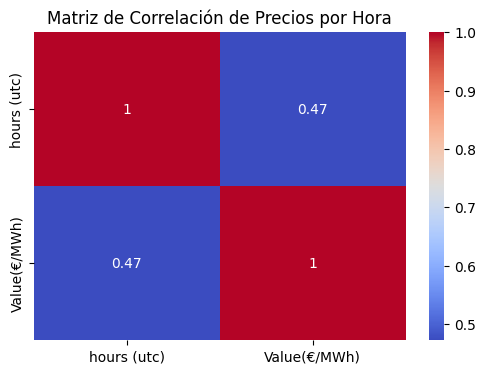

In [ ]:
# CORRELACION DE PRECIOS POR HORAS

# Aseguramos que los nombres de las columnas no tienen espacios en blanco
df.columns = df.columns.str.strip()

# Encontramos el precio más alto para cada hora
df_precios = df.groupby('hours (utc)')['Value(€/MWh)'].mean().reset_index()

# Convertimos las horas a un formato numérico si es necesario (por ejemplo, de "00:00" a 0, "01:00" a 1, etc.)
df_precios['hours (utc)'] = df_precios['hours (utc)'].str[:2].astype(int)

# Calculamos la correlación entre las horas y los precios más altos
correlacion = df_precios.corr()
print(correlacion)
print('\n')

# GRAFICO HEATMAP DE CORRELACION
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Precios por Hora')
plt.show()
print('\n')

# GRAFICO SCATTER CON LAS CORRELACIONES MAS ALTAS

fig = px.scatter(df_precios, x='hours (utc)', y='Value(€/MWh)',
                 title='Correlación entre horas y precios',
                 labels={'hours (utc)': 'Horas (UTC)', 'Value(€/MWh)': 'Precio (€/MWh)'})
fig.show()


### Podemos concluir de manera general que la correlación de las horas del día con el precio de la electricidad tienen una correlación moderada (0.57).

              hours (utc)  Value(€/MWh)
hours (utc)      1.000000      0.567355
Value(€/MWh)     0.567355      1.000000




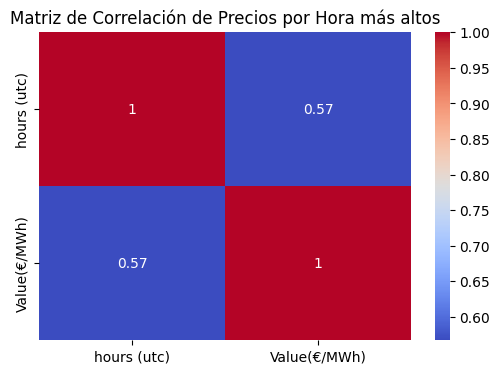

In [ ]:
# CORRELACION DE PRECIOS MAS ALTOS

# Aseguramos que los nombres de las columnas no tienen espacios en blanco
df.columns = df.columns.str.strip()

# Encontramos el precio más alto para cada hora
df_max_precios = df.groupby('hours (utc)')['Value(€/MWh)'].max().reset_index()

# Convertimos las horas a un formato numérico si es necesario (por ejemplo, de "00:00" a 0, "01:00" a 1, etc.)
df_max_precios['hours (utc)'] = df_max_precios['hours (utc)'].str[:2].astype(int)

# Calculamos la correlación entre las horas y los precios más altos
correlacion = df_max_precios.corr()

print(correlacion)
print('\n')

# GRAFICO DE CORRELACION
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Precios por Hora más altos')
plt.show()
print('\n')

# GRAFICO SCATTER CON LAS CORRELACIONES MAS ALTAS

fig = px.scatter(df_max_precios, x='hours (utc)', y='Value(€/MWh)',
                 title='Correlación entre horas y precios más altos',
                 labels={'hours (utc)': 'Horas (UTC)', 'Value(€/MWh)': 'Precio más alto (€/MWh)'})
fig.show()



### Como la correlación nos da 0.56, disponemos de una correlación moderada fuerte positiva. Esto sugiere una relación positiva entre las horas del día y los precios de la energía. Es decir, los datos muestran una tendencia más clara de que los precios son más altos en ciertas horas del día.

              hours (utc)  Value(€/MWh)
hours (utc)       1.00000       0.15268
Value(€/MWh)      0.15268       1.00000




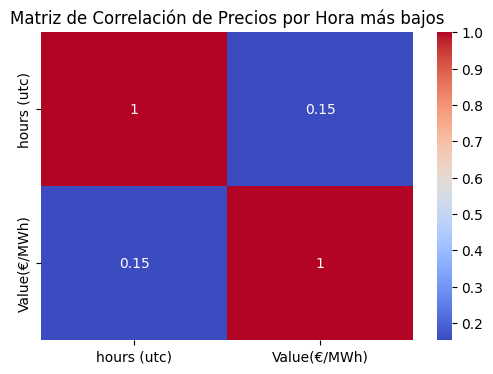

In [ ]:
# CORRELACION DE PRECIOS MAS BAJOS

# Aseguramos que los nombres de las columnas no tienen espacios en blanco
df.columns = df.columns.str.strip()

# Encontramos el precio más bajo para cada hora
df_min_precios = df.groupby('hours (utc)')['Value(€/MWh)'].min().reset_index()

# Convertimos las horas a un formato numérico si es necesario (por ejemplo, de "00:00" a 0, "01:00" a 1, etc.)
df_min_precios['hours (utc)'] = df_min_precios['hours (utc)'].str[:2].astype(int)

# Calculamos la correlación entre las horas y los precios más bajos
correlacion = df_min_precios.corr()

print(correlacion)
print('\n')

# GRAFICO DE CORRELACION
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Precios por Hora más bajos')
plt.show()
print('\n')

# GRAFICO SCATTER CON LAS CORRELACIONES MAS BAJAS

# Visualizamos la correlación con un gráfico de dispersión
fig = px.scatter(df_min_precios, x='hours (utc)', y='Value(€/MWh)',
                 title='Correlación entre horas y precios más bajos',
                 labels={'hours (utc)': 'Horas (UTC)', 'Value(€/MWh)': 'Precio más bajo (€/MWh)'})
fig.show()

### Como el resultado de las correlación de los precios mínimos es de 0.15, esto sugiere una correlación positiva muy débil entre las horas del día y los precios de la energía. Es decir, los datos no muestran una tendencia clara, y otros factores probablemente tiene un mayor influencia en los precios.

### Calculo mes más caro y mas barato por año

In [ ]:
# Hacemos el calculo anterior pero para todos los años
for year in df['year'].unique():
  df_year = df[df['year']==year]
  precio_mes = df_year.groupby('month')['Value(€/MWh)'].mean()
  precio_dia = df_year.groupby('date')['Value(€/MWh)'].mean()
  precio_hora = df_year.groupby(['date','hours (utc)'])['Value(€/MWh)'].mean()
  print(year)
  print(f'Mes max: {precio_mes.idxmax()}')
  print(f'Día max: {precio_dia.idxmax()}')
  print(f'Hora max: {precio_hora.idxmax()}')
  print(f'Mes min: {precio_mes.idxmin()}')
  print(f'Día min: {precio_dia.idxmin()}')
  print(f'Hora min: {precio_hora.idxmin()}')
  print('------------------------------')

2019
Mes max: 1
Día max: 2019-01-16
Hora max: ('2019-01-15', '18:00')
Mes min: 12
Día min: 2019-12-22
Hora min: ('2019-12-24', '03:00')
------------------------------
2020
Mes max: 12
Día max: 2020-12-17
Hora max: ('2020-12-17', '17:00')
Mes min: 4
Día min: 2020-05-01
Hora min: ('2020-05-01', '13:00')
------------------------------
2021
Mes max: 12
Día max: 2021-12-23
Hora max: ('2021-12-23', '17:00')
Mes min: 2
Día min: 2021-01-31
Hora min: ('2021-05-09', '13:00')
------------------------------
2022
Mes max: 3
Día max: 2022-03-08
Hora max: ('2022-03-08', '18:00')
Mes min: 12
Día min: 2022-12-31
Hora min: ('2022-12-31', '02:00')
------------------------------
2023
Mes max: 2
Día max: 2023-02-21
Hora max: ('2023-01-24', '18:00')
Mes min: 11
Día min: 2023-11-04
Hora min: ('2023-01-01', '00:00')
------------------------------
2024
Mes max: 1
Día max: 2024-01-09
Hora max: ('2024-02-05', '19:00')
Mes min: 4
Día min: 2024-04-05
Hora min: ('2024-06-16', '09:00')
------------------------------

In [ ]:
# Crear listas para almacenar los resultados
years = []
mes_max = []
dia_max = []
hora_max = []
mes_min = []
dia_min = []
hora_min = []

# Hacemos el cálculo para todos los años
for year in df['year'].unique():
    df_year = df[df['year'] == year]
    precio_mes = df_year.groupby('month')['Value(€/MWh)'].mean()
    precio_dia = df_year.groupby('date')['Value(€/MWh)'].mean()
    precio_hora = df_year.groupby(['date', 'hours (utc)'])['Value(€/MWh)'].mean()

    years.append(year)
    mes_max.append(precio_mes.idxmax())
    dia_max.append(precio_dia.idxmax())
    hora_max.append(precio_hora.idxmax())
    mes_min.append(precio_mes.idxmin())
    dia_min.append(precio_dia.idxmin())
    hora_min.append(precio_hora.idxmin())

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Year': years,
    'Mes Max': mes_max,
    'Dia Max': dia_max,
    'Hora Max': hora_max,
    'Mes Min': mes_min,
    'Dia Min': dia_min,
    'Hora Min': hora_min
})

resultados

,Year,Mes Max,Dia Max,Hora Max,Mes Min,Dia Min,Hora Min
0,2019,1,2019-01-16,"(2019-01-15, 18:00)",12,2019-12-22,"(2019-12-24, 03:00)"
1,2020,12,2020-12-17,"(2020-12-17, 17:00)",4,2020-05-01,"(2020-05-01, 13:00)"
2,2021,12,2021-12-23,"(2021-12-23, 17:00)",2,2021-01-31,"(2021-05-09, 13:00)"
3,2022,3,2022-03-08,"(2022-03-08, 18:00)",12,2022-12-31,"(2022-12-31, 02:00)"
4,2023,2,2023-02-21,"(2023-01-24, 18:00)",11,2023-11-04,"(2023-01-01, 00:00)"
5,2024,1,2024-01-09,"(2024-02-05, 19:00)",4,2024-04-05,"(2024-06-16, 09:00)"


In [ ]:

# Gráfico de barras para los valores máximos
fig_max = go.Figure()

fig_max.add_trace(go.Bar(
    x=resultados['Year'],
    y=resultados['Mes Max'],
    name='Mes Max',
    marker_color='blue'
))

fig_max.add_trace(go.Bar(
    x=resultados['Year'],
    y=resultados['Dia Max'],
    name='Dia Max',
    marker_color='green'
))

fig_max.add_trace(go.Bar(
    x=resultados['Year'],
    y=[x[1] for x in resultados['Hora Max']], # Extraer la hora de los índices de las horas
    name='Hora Max',
    marker_color='red'
))

fig_max.update_layout(
    title='Valores Máximos por Año',
    xaxis_title='Año',
    yaxis_title='Valor',
    barmode='group'
)

'''
# Guardar el gráfico como archivo HTML
fig_max.write_html("grafico_maximos_bar.html")

# Descargar el archivo HTML
files.download("grafico_maximos_bar.html")
'''

# Gráfico de barras para los valores mínimos
fig_min = go.Figure()

fig_min.add_trace(go.Bar(
    x=resultados['Year'],
    y=resultados['Mes Min'],
    name='Mes Min',
    marker_color='blue'
))

fig_min.add_trace(go.Bar(
    x=resultados['Year'],
    y=resultados['Dia Min'],
    name='Dia Min',
    marker_color='green'
))

fig_min.add_trace(go.Bar(
    x=resultados['Year'],
    y=[x[1] for x in resultados['Hora Min']], # Extraer la hora de los índices de las horas
    name='Hora Min',
    marker_color='red'
))

fig_min.update_layout(
    title='Valores Mínimos por Año',
    xaxis_title='Año',
    yaxis_title='Valor',
    barmode='group'
)

fig_max.show()
fig_min.show()

'''
# Guardar el gráfico como archivo HTML
fig_min.write_html("grafico_minimos_bar.html")

# Descargar el archivo HTML
files.download("grafico_minimos_bar.html")
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Asumiendo que 'resultados' es tu DataFrame o diccionario con los datos necesarios.

# Gráfico de líneas para los valores máximos
fig_max = go.Figure()

fig_max.add_trace(go.Scatter(
    x=resultados['Year'],
    y=resultados['Mes Max'],
    mode='lines+markers',
    name='Mes Max',
    line=dict(color='blue')
))

fig_max.add_trace(go.Scatter(
    x=resultados['Year'],
    y=resultados['Dia Max'],
    mode='lines+markers',
    name='Dia Max',
    line=dict(color='green')
))

fig_max.add_trace(go.Scatter(
    x=resultados['Year'],
    y=[x[1] for x in resultados['Hora Max']], # Extraer la hora de los índices de las horas
    mode='lines+markers',
    name='Hora Max',
    line=dict(color='red')
))

fig_max.update_layout(
    title='Valores Máximos por Año',
    xaxis_title='Año',
    yaxis_title='Valor'
)

'''
# Guardar el gráfico como archivo HTML
fig_max.write_html("grafico_maximos_line.html")

# Descargar el archivo HTML
files.download("grafico_maximos_line.html")
'''

# Gráfico de líneas para los valores mínimos
fig_min = go.Figure()

fig_min.add_trace(go.Scatter(
    x=resultados['Year'],
    y=resultados['Mes Min'],
    mode='lines+markers',
    name='Mes Min',
    line=dict(color='blue')
))

fig_min.add_trace(go.Scatter(
    x=resultados['Year'],
    y=resultados['Dia Min'],
    mode='lines+markers',
    name='Dia Min',
    line=dict(color='green')
))

fig_min.add_trace(go.Scatter(
    x=resultados['Year'],
    y=[x[1] for x in resultados['Hora Min']], # Extraer la hora de los índices de las horas
    mode='lines+markers',
    name='Hora Min',
    line=dict(color='red')
))

fig_min.update_layout(
    title='Valores Mínimos por Año',
    xaxis_title='Año',
    yaxis_title='Valor'
)


fig_max.show()
fig_min.show()


'''
# Guardar el gráfico como archivo HTML
fig_min.write_html("grafico_minimos_line.html")

# Descargar el archivo HTML
files.download("grafico_minimos_line.html")
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Gracias esta última representación podemos ver como por regla general los precios de electricidad más caro suelen son primeros meses del año y los precios de la electricidad más baratos se encuentran en los meses finales del año. Tenemos que aclarar que los datos de los meses del año 2020-2021 son datos borrosos porque son años en los que estuvo el COVID-19 de manera presente en todos los hogares del mundo, y no se pudo hacer un gasto normal de las cosas y de la electricidad.